In [2]:
import multiprocessing as mp
mp.set_start_method('spawn', force = True)
import shelve
import pandas as pd
import numpy as np
import lightgbm as lgb
import shap
import concurrent.futures

shap.initjs()

In [3]:
filename='/u/scratch/s/seanchea/models/SALL2/1/python/context2/saveData'
my_shelf = shelve.open(filename)
for key in my_shelf:
    globals()[key]=my_shelf[key]
my_shelf.close()

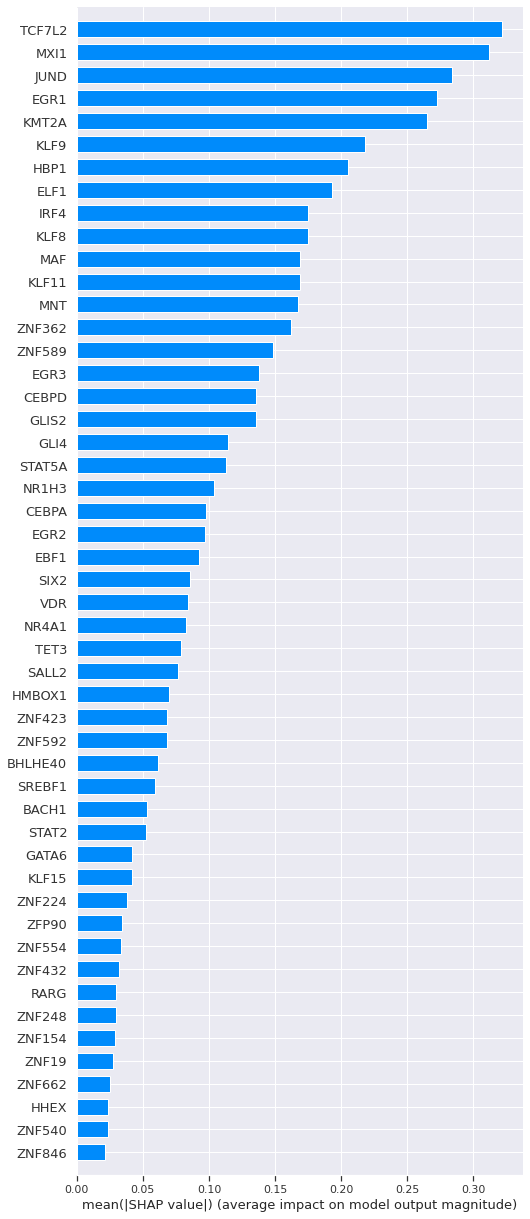

In [11]:
shap.summary_plot(shap_values_full[1], features = X, feature_names = features, plot_type="bar", max_display = 50)

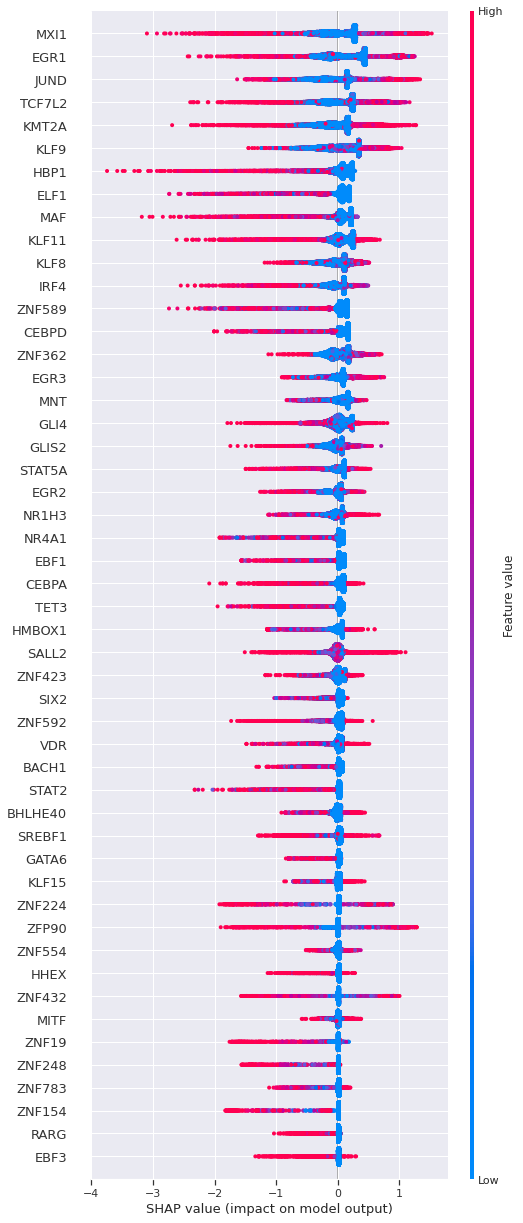

In [20]:
shap.summary_plot(shap_values_full[1], features = X, feature_names = features, plot_type="dot", max_display = 50)

In [3]:
explainer = shap.TreeExplainer(trees)

In [5]:
shap.force_plot(explainer.expected_value, shap_values_full[1][21,:], X.iloc[21,:])

&lt;shap.plots._force.AdditiveForceVisualizer at 0x7f6ca5831df0&gt;

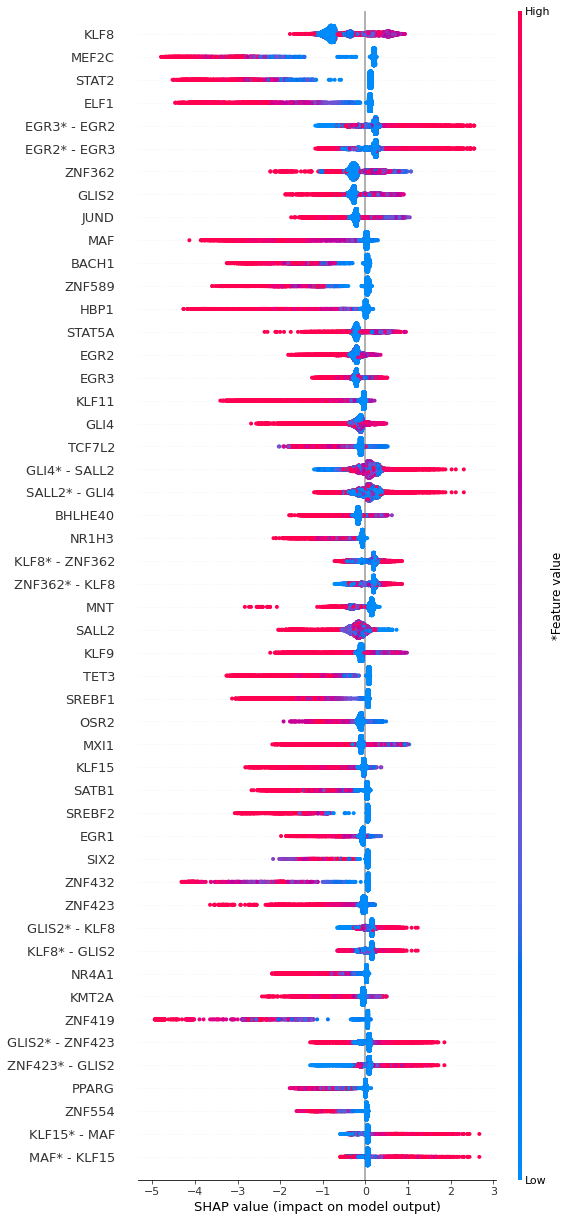

In [6]:
shap.summary_plot(allInteractions_full, features=X, max_display = 50, plot_type = "compact_dot")

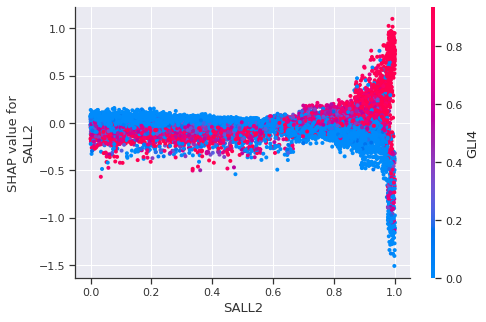

In [21]:
shap.dependence_plot("SALL2", shap_values_full[1], X)

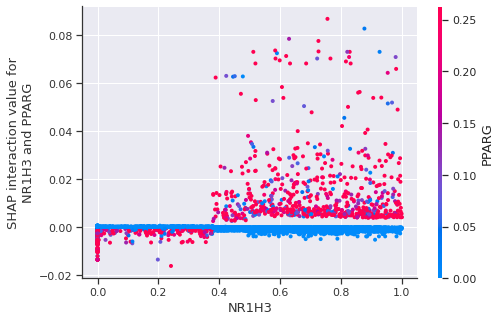

In [17]:
shap.dependence_plot(["NR1H3", "PPARG"], allInteractions_full, X)

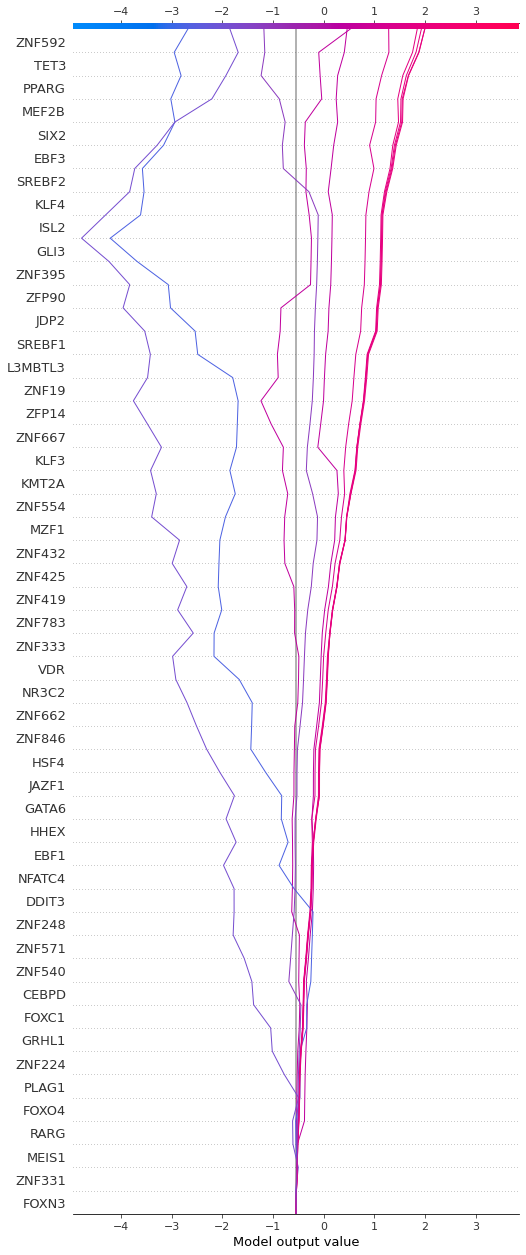

In [25]:
allInteractions_full[:6503, :, :]

array([[[-1.11321188e-01, -8.30800809e-03,  7.34131725e-04, ...,
          3.70561989e-06, -1.13369571e-06, -4.02534293e-06],
        [-8.30800809e-03, -5.65899615e-01, -1.71826872e-03, ...,
          2.32264101e-06,  6.66539022e-06, -2.14128072e-05],
        [ 7.34131725e-04, -1.71826872e-03,  9.58162926e-02, ...,
          0.00000000e+00,  3.66148131e-06,  4.97133261e-06],
        ...,
        [ 3.70561989e-06,  2.32264101e-06,  0.00000000e+00, ...,
          7.27937680e-04,  0.00000000e+00,  0.00000000e+00],
        [-1.13369571e-06,  6.66539022e-06,  3.66148131e-06, ...,
          0.00000000e+00,  5.93411871e-03,  8.77969093e-06],
        [-4.02534293e-06, -2.14128072e-05,  4.97133261e-06, ...,
          0.00000000e+00,  8.77969093e-06,  8.88416331e-03]],

       [[-9.57242998e-02, -7.53373878e-03, -4.08062752e-03, ...,
          7.64594845e-07, -1.15012118e-05, -1.60619966e-05],
        [-7.53373878e-03, -6.75109490e-01,  2.39764567e-02, ...,
          2.59749736e-06,  1.55567243e

In [30]:
avg = np.mean(allInteractions_full[:10597, :, :], axis=0)

In [69]:
avg1 = np.mean(allInteractions_full[:10597, :, :], axis=0)

In [70]:
avg = np.mean(np.stack([avg,avg1], axis=0), axis=0)

In [71]:
import scipy as sc
clust = sc.cluster.hierarchy.fclusterdata(avg, 0.10, criterion="distance", method="average")
pruned = avg[(clust!=1), :]
pruned = pruned[:, (clust!=1)]
from itertools import compress
pruned_features = list(compress(features, clust!=1))

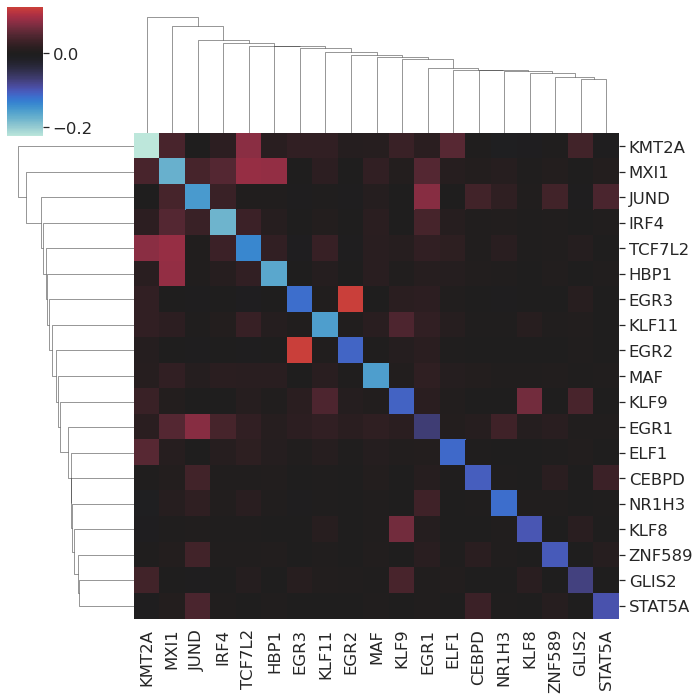

In [74]:
import seaborn as sns
import matplotlib.pylab as plt
sns.set(font_scale=1.5)
ax = sns.clustermap(pruned, method="average", center=0, xticklabels=pruned_features, yticklabels=pruned_features, square=True)
plt.show()

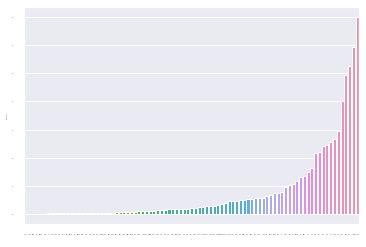

In [16]:
import seaborn as sns
avg = np.mean(shap_values_full[1][:10597,:], axis=0)
df = pd.DataFrame({'TF':features, 'Mean SHAP':avg})
sns.set(font_scale=0.05)
sns.barplot(x="TF", y="Mean SHAP", data=df, order=df.sort_values('Mean SHAP').TF)

In [8]:
df

,Factor,SHAP
0,KLF11,0.109460
1,SALL2,0.032975
2,TCF7L2,0.350650
3,EGR1,0.262998
4,EGR2,0.024328
...,...,...
84,SALL4,0.001979
85,HSF4,0.002161
86,JAZF1,0.000000
87,NFATC4,0.001754
